In [1]:
# Pure python modules and jupyter notebook functionality
# first you should import the third-party python modules which you'll use later on
# the first line enables that figures are shown inline, directly in the notebook
%matplotlib inline
import os
import datetime 
import pandas as pd
from os import path
import numpy as np
import sys
import xarray as xr
from matplotlib import pyplot as plt
from shyft.hydrology import shyftdata_dir
shyft_data_path = os.path.abspath("../../../../shyft-data/")
if path.exists(shyft_data_path) and 'SHYFT_DATA' not in os.environ:
    os.environ['SHYFT_DATA']=shyft_data_path

import shyft
import shyft.time_series as sts
import shyft.hydrology as api
from shyft.hydrology.pt_st_k import PTSTKModel
from shyft.hydrology.repository.default_state_repository import DefaultStateRepository
from shyft.hydrology.orchestration.configuration.yaml_configs import YAMLSimConfig, YAMLCalibConfig
from shyft.hydrology.orchestration.simulators.config_simulator import ConfigSimulator, ConfigCalibrator

# 1. Configuration of simulation

In [2]:
discretization = 'tin' #regular, tin
discretization_size = 'bigger' # NB! Only for tin (small, average, bigger, largest)
model_stack = 'ptstk' #ptgsk, ptstk
simulation_time = 10 #10, 15 years
calibration_time = 5 #5 years
calibration_resolution = 'daily' # daily, hourly

In [3]:
yaml_dir = shyftdata_dir + '/budhi_gandaki/yaml_config'
if discretization == 'tin':
    sim_path = yaml_dir + f'/{discretization}/{model_stack}/{simulation_time}s_{calibration_time}c_{calibration_resolution}/{discretization_size}/budhi_gandaki_simulation_tin.yaml'
    calib_path = yaml_dir + f'/{discretization}/{model_stack}/{simulation_time}s_{calibration_time}c_{calibration_resolution}/{discretization_size}/budhi_gandaki_calibration_tin.yaml'
    description = f'{discretization_size}_{discretization}_{model_stack}_{simulation_time}s_{calibration_time}c_{calibration_resolution}'
elif discretization == 'regular':
    sim_path = yaml_dir + f'/{discretization}/{model_stack}/{simulation_time}s_{calibration_time}c_{calibration_resolution}/budhi_gandaki_simulation.yaml'
    calib_path = yaml_dir + f'/{discretization}/{model_stack}/{simulation_time}s_{calibration_time}c_{calibration_resolution}/budhi_gandaki_calibration.yaml'
    description = f'{discretization}_{model_stack}_{simulation_time}s_{calibration_time}c_{calibration_resolution}'
print(f'Description: {description}') 
print(f'Simulation path: {sim_path}')
print(f'Calibration path: {calib_path}')

Description: small_tin_ptstk_10s_5c_daily
Simulation path: /uio/hume/student-u63/jacobqs/Master/code/MST-Himalaya/shyft_workspace_copy/shyft_workspace/shyft-data/budhi_gandaki/yaml_config/tin/ptstk/10s_5c_daily/small/budhi_gandaki_simulation_tin.yaml
Calibration path: /uio/hume/student-u63/jacobqs/Master/code/MST-Himalaya/shyft_workspace_copy/shyft_workspace/shyft-data/budhi_gandaki/yaml_config/tin/ptstk/10s_5c_daily/small/budhi_gandaki_calibration_tin.yaml


In [4]:
cfg_sim = YAMLSimConfig(sim_path, "budhi_gandaki")
simulator = ConfigSimulator(cfg_sim)
cfg_calib = YAMLCalibConfig(calib_path, 'budhi_gandaki')

bare
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
bare
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
snow_and_ice
vegetation_type_1
vegetation_type_1
vegetation_type_1
bare
vegetation_type_1
bare
vegetation_type_1
bare
bare
snow_and_ice
bare
vegetation_type_1
vegetation_type_1
crop_type_2
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
snow_and_ice
vegetation_type_1
snow_and_ice
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
snow_and_ice
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
bare
vegetation_type_1
bare
bare
vegetation_type_1
vegetation_type_1
crop_type_4
bare
vegetation_type_1
vegetation_type_1
snow_and_ice
vegetation_type_1
vegetation_type

/uio/hume/student-u63/jacobqs/pyenv/lib64/python3.10/site-packages/mst_himalaya/cf_region_model_repository_tin.py:108: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  bb_proj = pyproj.transform(target_proj, data_proj, bbox[0], bbox[1])
/uio/hume/student-u63/jacobqs/pyenv/lib64/python3.10/site-packages/mst_himalaya/cf_region_model_repository_tin.py:118: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xx, yy = pyproj.transform(data_proj, target_proj, x, y)


In [5]:
cfg_calib.calibration_parameters

{'kirchner.c1': {'min': -8.0, 'max': 0.0},
 'kirchner.c2': {'min': -1.0, 'max': 1.2},
 'kirchner.c3': {'min': -0.15, 'max': -0.05},
 'ae.ae_scale_factor': {'min': 1.0, 'max': 1.0},
 'st.shape': {'min': 2.0, 'max': 2.0},
 'st.tx': {'min': -3.0, 'max': 2.0},
 'st.cx': {'min': 0.0, 'max': 30.0},
 'st.ts': {'min': -4.0, 'max': 4.0},
 'st.lwmax': {'min': 0.0, 'max': 1.0},
 'st.cfr': {'min': 0.0, 'max': 1.0},
 'gm.dtf': {'min': 6, 'max': 6},
 'p_corr.scale_factor': {'min': 0.4, 'max': 2.0},
 'pt.albedo': {'min': 0.2, 'max': 0.2},
 'pt.alpha': {'min': 1.26, 'max': 1.26},
 'routing.velocity': {'min': 0, 'max': 0},
 'routing.alpha': {'min': 0.9, 'max': 0.9},
 'routing.beta': {'min': 3.0, 'max': 3.0},
 'gm.direct_response': {'min': 0.0, 'max': 1.0},
 'msp.reservoir_direct_response_fraction': {'min': 1.0, 'max': 1.0}}

In [6]:
cfg_calib.sim_config.model_config.model_parameters()

{'ae': {'ae_scale_factor': 1.0},
 'gm': {'direct_response': 0.49851600020154796, 'dtf': 6.0},
 'kirchner': {'c1': -5.877597352150859,
  'c2': 0.06877101518233775,
  'c3': -0.10405479779759402},
 'msp': {'reservoir_direct_response_fraction': 1.0},
 'p_corr': {'scale_factor': 1.2621807294368872},
 'pt': {'albedo': 0.2, 'alpha': 1.26},
 'routing': {'alpha': 0.9, 'beta': 3.0, 'velocity': 0.0},
 'st': {'cfr': 0.25463445726855105,
  'cx': 20.35258669389384,
  'lwmax': 0.4798392898435437,
  'shape': 2.0,
  'ts': -2.4707652236938777,
  'tx': 0.6216107980063565}}

In [7]:
cfg_calib.sim_config.region_config.domain()

{'EPSG': 32645,
 'nx': 75,
 'ny': 105,
 'step_x': 1000,
 'step_y': 1000,
 'lower_left_x': 250828,
 'lower_left_y': 3100180}

# 2. Running simulation

In [8]:
print('Running simulation...')
simulator.run()
print('Simulation finished running ')

Running simulation...
Running simulation...
Simulation finished running 


# 3. Post-processing and data extraction

####  Visualizing the discharge for the catchment

In [9]:
region_model = simulator.region_model

In [10]:
q_10_ts = region_model.statistics.discharge([10])
q_10_np = q_10_ts.values

##### Timeseries

Text(0, 0.5, 'discharge [m3 s-1]')

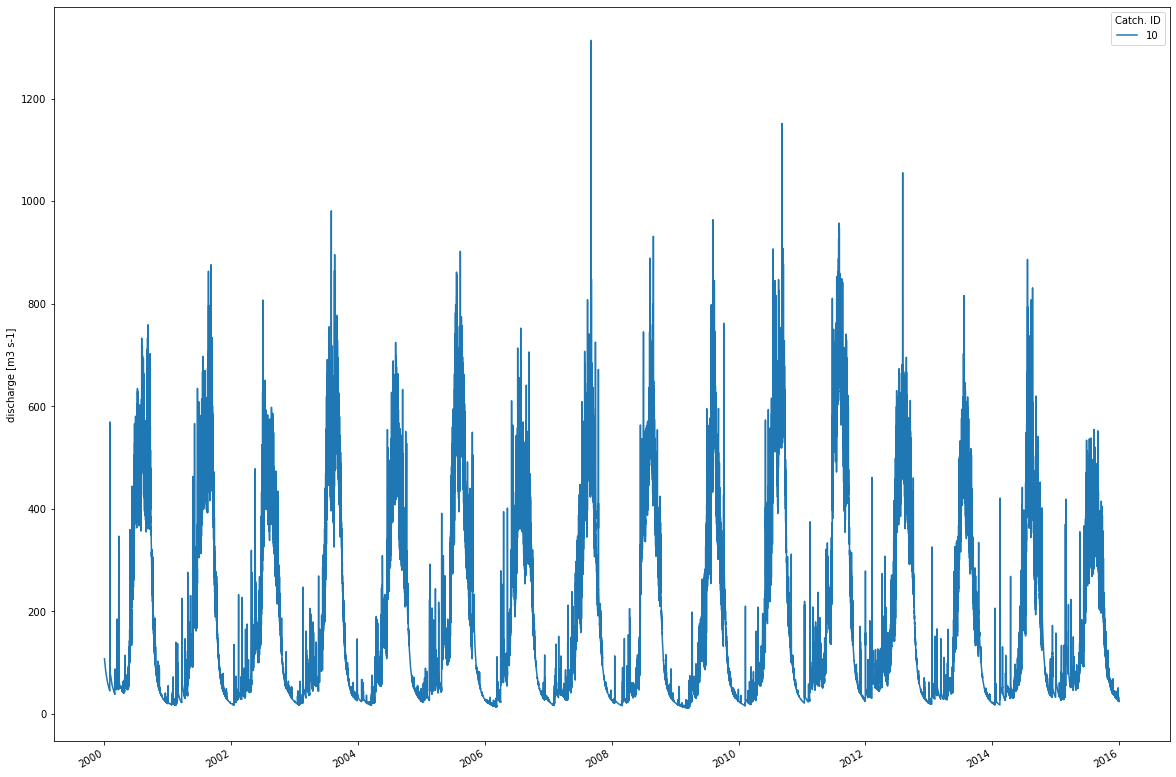

In [11]:
# We can make a quick plot of the data of each sub-catchment
fig, ax = plt.subplots(figsize=(20,15))

timestamps = [region_model.time_axis.time(i) for i in range(0, region_model.time_axis.n)]
ts_timestamps = [datetime.datetime.utcfromtimestamp(p.seconds) for p in timestamps]

# plot each catchment discharge in the catchment_ids
for i,cid in enumerate(region_model.catchment_ids):
    # a ts.time_axis can be enumerated to it's UtcPeriod, 
    # that will have a .start and .end of type utctimestamp
    # to use matplotlib support for datetime-axis, we convert it to datetime (as above)

    data = region_model.statistics.discharge([int(cid)]).values

    ax.plot(ts_timestamps,data, label = "{}".format(region_model.catchment_ids[i]))

fig.autofmt_xdate()
ax.legend(title="Catch. ID")
ax.set_ylabel("discharge [m3 s-1]")

##### Catchment map

In [12]:
cells = region_model.get_cells()

# Once we have the cells, we can get their coordinate information
# and fetch the x- and y-location of the cells
x = np.array([cell.geo.mid_point().x for cell in cells])
y = np.array([cell.geo.mid_point().y for cell in cells])

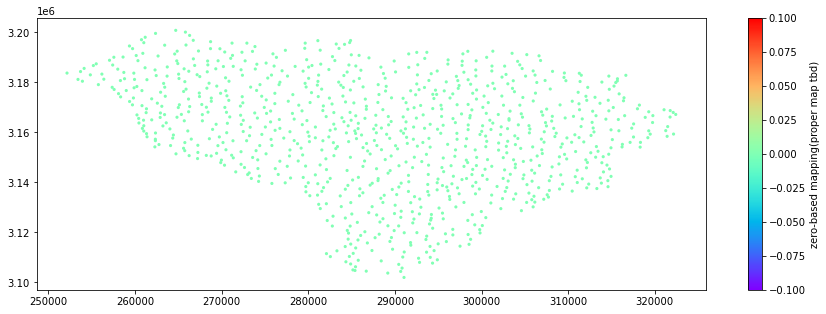

In [13]:
 # let's create the mapping of catchment_id to an integer:
catchment_ids = region_model.catchment_ids
cid_z_map = dict([ (catchment_ids[i],i) for i in range(len(catchment_ids))])

# then create an array the same length as our 'x' and 'y', which holds the
# integer value that we'll use for the 'z' value
catch_ids = np.array([cid_z_map[cell.geo.catchment_id()] for cell in cells])

# and make a quick catchment map...
# using a scatter plot of the cells
fig, ax = plt.subplots(figsize=(15,5))
cm = plt.cm.get_cmap('rainbow')
plot = ax.scatter(x, y, c=catch_ids, marker='.', s=40, lw=0, cmap=cm)
plt.colorbar(plot).set_label('zero-based mapping(proper map tbd)')

##### Snow-cover

Text(0.5, 1.0, 'Snow Covered area of budhi_gandaki_small_tin_ptstk_10s_5c_daily on 2011-02-15T00:00:00+01')

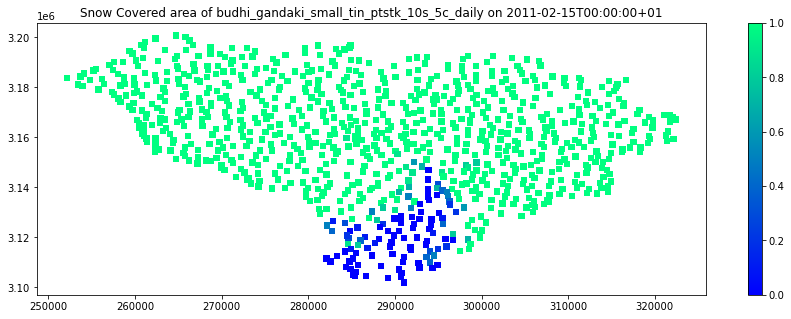

In [14]:
#first, set a date: year, month, day, (hour of day if hourly time step)
oslo = sts.Calendar('Europe/Oslo') # specifying input calendar in Oslo tz-id
time_x = oslo.time(2011,2,15)  # the oslo calendar(incl dst) converts calendar coordinates Y,M,D.. to its utc-time

# we need to get the index of the time_axis for the time
try:
    idx = simulator.region_model.time_axis.index_of(time_x) # index of time x on time-axis
except:
    print("Date out of range, setting index to 0")
    idx = 0

# fetching SCA (the response variable is named "snow_sca")
# You can use tab-completion to explore the `rc`, short for "response collector"
# object of the cell, to see further response variables available.
# specifying empty list [] indicates all catchments, otherwise pass catchment_id
sca = simulator.region_model.statistics.snow_sca([],idx)

# We can make a simple scatter plot again for quick visualization
fig, ax = plt.subplots(figsize=(15,5))
cm = plt.cm.get_cmap('winter')
plot = ax.scatter(x, y, c=sca, 
                  vmin=0, vmax=1, 
                  marker='s', s=40, lw=0, 
                  cmap=cm)
plt.colorbar(plot)
plt.title('Snow Covered area of {0} on {1}'.format(cfg_sim.region_model_id, oslo.to_string(time_x)))


Average SCA for Budhi Gandaki: 0.9002195389681668


Text(0, 0.5, 'frequency')

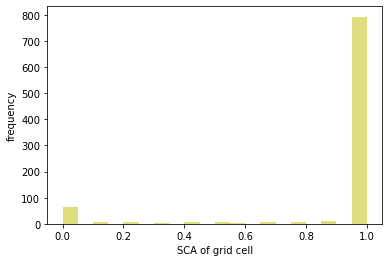

In [15]:
# look at the catchment-wide average:
nea_avg_sca = np.average(sca)
print("Average SCA for Budhi Gandaki: {0}".format(nea_avg_sca))

# And let's compute histogram of the snow covered area as well
fig, ax = plt.subplots()
ax.hist(sca, bins=20, range=(0,1), color='y', alpha=0.5)
ax.set_xlabel("SCA of grid cell")
ax.set_ylabel("frequency")

# 4. Configuration of Shyft calibration

In [16]:
state = simulator.region_model.state

In [17]:
calib = ConfigCalibrator(cfg_calib)
n_cells = calib.region_model.size()
state_repos = DefaultStateRepository(calib.region_model)

bare
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
bare
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
snow_and_ice
vegetation_type_1
vegetation_type_1
vegetation_type_1
bare
vegetation_type_1
bare
vegetation_type_1
bare
bare
snow_and_ice
bare
vegetation_type_1
vegetation_type_1
crop_type_2
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
snow_and_ice
vegetation_type_1
snow_and_ice
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
snow_and_ice
vegetation_type_1
vegetation_type_1
vegetation_type_1
vegetation_type_1
bare
vegetation_type_1
bare
bare
vegetation_type_1
vegetation_type_1
crop_type_4
bare
vegetation_type_1
vegetation_type_1
snow_and_ice
vegetation_type_1
vegetation_type

/uio/hume/student-u63/jacobqs/pyenv/lib64/python3.10/site-packages/mst_himalaya/cf_region_model_repository_tin.py:108: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  bb_proj = pyproj.transform(target_proj, data_proj, bbox[0], bbox[1])
/uio/hume/student-u63/jacobqs/pyenv/lib64/python3.10/site-packages/mst_himalaya/cf_region_model_repository_tin.py:118: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xx, yy = pyproj.transform(data_proj, target_proj, x, y)


Creating TargetSpecificationVector...


# 5. Running Shyft calibration

In [18]:
results = calib.calibrate(cfg_calib.sim_config.time_axis, state_repos.get_state(0), 
                          cfg_calib.optimization_method['name'],
                          cfg_calib.optimization_method['params'])

Calibrating...
Storing calibrated params in: /uio/hume/student-u63/jacobqs/Master/code/MST-Himalaya/shyft_workspace_copy/shyft_workspace/shyft-data/budhi_gandaki/yaml_config/tin/ptstk/10s_5c_daily/small/calibrated_model.yaml


# 6. Inspecting the calibration results

In [19]:
 # Get NSE of calibrated run:
result_params = []
for i in range(results.size()):
    result_params.append(results.get(i))
print("Final NSE =", 1-calib.optimizer.calculate_goal_function(result_params))

Final NSE = 0.9060028339699999


In [20]:
# Check out the calibrated parameters.

diff = 1.0E-3
print("{0:30s} {1:10s}".format("PARAM-NAME", "CALIB-VALUE"))

for i in range(results.size()):
    print("{0:30s} {1:10f}".format(results.get_name(i), results.get(i)))

PARAM-NAME                     CALIB-VALUE
kirchner.c1                     -5.877597
kirchner.c2                      0.068771
kirchner.c3                     -0.104055
ae.ae_scale_factor               1.000000
st.shape                         2.000000
st.tx                            0.621611
st.cx                           20.352587
st.ts                           -2.470765
st.lwmax                         0.479839
st.cfr                           0.254634
gm.dtf                           6.000000
p_corr.scale_factor              1.262181
pt.albedo                        0.200000
pt.alpha                         1.260000
routing.velocity                 0.000000
routing.alpha                    0.900000
routing.beta                     3.000000
gm.direct_response               0.498516
msp.reservoir_direct_response_fraction   1.000000


# 7. Plotting simulated vs observed discharge

In [21]:
# get the target vector and discharge statistics from the configured calibrator
target_obs = calib.tv[0]
disch_sim = calib.region_model.statistics.discharge(target_obs.catchment_indexes)
disch_obs = target_obs.ts.values


ts_timestamps_sim = [datetime.datetime.utcfromtimestamp(p) for p in disch_sim.time_axis.time_points]
ts_timestamps_sim = ts_timestamps_sim[:-1]

ts_timestamps_obs = [datetime.datetime.utcfromtimestamp(p) for p in target_obs.ts.time_axis.time_points]
ts_timestamps_obs = ts_timestamps_obs[:-1]

# 8. Saving results as a netcdf file

In [22]:
# Extracting values
disch_sim = calib.region_model.statistics.discharge(target_obs.catchment_indexes)
precip_sim = calib.region_model.statistics.precipitation(target_obs.catchment_indexes)
temp_sim = calib.region_model.statistics.temperature(target_obs.catchment_indexes)
rad_sim = calib.region_model.statistics.radiation(target_obs.catchment_indexes)
rel_hum_sim = calib.region_model.statistics.rel_hum(target_obs.catchment_indexes)
wind_speed_sim = calib.region_model.statistics.wind_speed(target_obs.catchment_indexes)
elev_sim = calib.region_model.statistics.elevation(target_obs.catchment_indexes)
snow_sca_sim = calib.region_model.statistics.snow_sca(target_obs.catchment_indexes)
snow_swe_sim = calib.region_model.statistics.snow_swe(target_obs.catchment_indexes)
forest_area_sim = calib.region_model.statistics.forest_area(target_obs.catchment_indexes)
glacier_area_sim = calib.region_model.statistics.glacier_area(target_obs.catchment_indexes)
lake_area_sim = calib.region_model.statistics.lake_area(target_obs.catchment_indexes)
total_area_sim = calib.region_model.statistics.total_area(target_obs.catchment_indexes)
unspecified_area_sim = calib.region_model.statistics.unspecified_area(target_obs.catchment_indexes)
charge_sim = calib.region_model.statistics.charge(target_obs.catchment_indexes)
reservoir_area_sim = calib.region_model.statistics.reservoir_area(target_obs.catchment_indexes)
disch_obs = target_obs.ts.values

In [23]:
# Extracting time
ts_timestamps_sim = [datetime.datetime.utcfromtimestamp(p) for p in disch_sim.time_axis.time_points]
ts_timestamps_sim = ts_timestamps_sim[:-1]


ts_timestamps_obs = [datetime.datetime.utcfromtimestamp(p) for p in target_obs.ts.time_axis.time_points]
ts_timestamps_obs = ts_timestamps_obs[:-1]

In [24]:
start_time = str(cfg_calib.sim_config.start_datetime)[:10]
run_time_step = str(cfg_calib.sim_config.run_time_step)
number_of_steps = str(cfg_calib.sim_config.number_of_steps)

In [25]:
number_of_steps

'87648'

In [26]:
calib_params_range = cfg_calib.calibration_parameters

In [27]:
# Save parameters
params = dict()
for i in range(results.size()):
    params[results.get_name(i)] = results.get(i)

In [28]:
#d_o = xr.open_mfdataset('/uio/hume/student-u63/jacobqs/Master/code/MST-Himalaya/shyft_workspace_copy/shyft_workspace/shyft-data/netcdf/orchestration-testdata/discharge.nc')

In [29]:
#d_o.time

In [30]:
ds_sim = xr.Dataset(
    data_vars = dict(
        disch_sim = (['time'], disch_sim.values),
        temperature = (['time'], temp_sim.values),
        precipitation = (['time'], precip_sim.values),
        wind_speed = (['time'], wind_speed_sim.values),
        radiation = (['time'], rad_sim.values),
        relative_humidity = (['time'], rel_hum_sim.values),
        #calibration_parameter_range = ([], calib_params_range),
        #optimal_parameters = ([], params),
    ),
    coords = dict(
        time = (['time'],ts_timestamps_sim ),
    ),
    attrs = dict(description = description,
                 start_time = start_time,
                 run_time_step = run_time_step,
                 number_of_steps = number_of_steps,
                 nse = 1-calib.optimizer.calculate_goal_function(result_params),
                 elevation = str(elev_sim) + ' m.a.s.l.',
                 forest_area = str(forest_area_sim) + ' m^2',
                 glacier_area = str(glacier_area_sim) + ' m^2',
                 lake_area = str(lake_area_sim) + ' m^2',
                 total_area = str(total_area_sim) + ' m^2',
                 unspecified_area = str(unspecified_area_sim) + ' m^2',
                 reservoir_area = str(reservoir_area_sim) + ' m^2',
                kirchner_c1 = params['kirchner.c1'],
                kirchner_c2 = params['kirchner.c2'],
                kirchner_c3 = params['kirchner.c3'],
                ae_scale_factor = params['ae.ae_scale_factor'],
                gm_direct_response = params['gm.direct_response'],
                gm_dtf = params['gm.dtf'],
                p_corr = params['p_corr.scale_factor'],
                pt_albedo = params['pt.albedo'],
                pt_alpha = params['pt.alpha'],
                routing_velocity = params['routing.velocity'],
                routing_alpha = params['routing.alpha'],
                routing_beta = params['routing.beta'],
                # PTSTK
                st_cfr = params['st.cfr'],
                st_cx = params['st.cx'],
                st_lwmax = params['st.lwmax'],
                shape = params['st.shape'],
                st_ts = params['st.ts'],
                st_tx = params['st.tx'],
                msp_reservoir_direct_response_fraction = params['msp.reservoir_direct_response_fraction'],
                run_time_calib = '166m 2.2s'
                
                
                
))

In [31]:
# ds_obs = xr.Dataset(
#     data_vars = dict(
#         discharge_observed = (['time'], disch_obs),
#     ),
#     coords = dict(
#         time = (['time'],ts_timestamps_obs )
#     )
# )

In [32]:
ds_sim.to_netcdf(path = f'{shyftdata_dir}/SIMULATIONS/{description}.nc' ,
                 format = 'NETCDF4')

In [17]:
new_ds = xr.open_mfdataset(f'{shyftdata_dir}/SIMULATIONS/{description}.nc')

In [18]:
new_ds

<xarray.Dataset>
Dimensions:            (time: 87648)
Coordinates:
  * time               (time) datetime64[ns] 2000-01-01 ... 2009-12-30T23:00:00
Data variables:
    disch_sim          (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    temperature        (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    precipitation      (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    wind_speed         (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    radiation          (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
    relative_humidity  (time) float64 dask.array<chunksize=(87648,), meta=np.ndarray>
Attributes: (12/32)
    description:                             small_tin_ptstk_10s_5c_daily
    start_time:                              2000-01-01
    run_time_step:                           3600
    number_of_steps:                         87648
    nse:                                     0.9060028339699999
    elevation:                               4270.317085266083 m.a.s.l.
    ...                                      ...
    st_lwmax:                                0.4798392898435437
    shape:                                   2.0
    st_ts:                                   -2.4707652236938777
    st_tx:                                   0.6216107980063565
    msp_reservoir_direct_response_fraction:  1.0
    run_time_calib:                          166m 2.2s

# Post-calibration run

In [19]:
ae = simulator.region_model.actual_evaptranspiration_response.output([10]).values
gm = simulator.region_model.snow_tiles_response.glacier_melt([10]).values
outflow = simulator.region_model.snow_tiles_response.outflow([10]).values
sca = simulator.region_model.snow_tiles_response.sca([10]).values 
swe = simulator.region_model.snow_tiles_response.swe([10]).values
pt = simulator.region_model.priestley_taylor_response.output([10]).values
disch_sim = simulator.region_model.statistics.discharge([10]).values
radiation = simulator.region_model.statistics.radiation([10]).values
wind_speed = simulator.region_model.statistics.wind_speed([10]).values
rel_hum = simulator.region_model.statistics.rel_hum([10]).values
temp = simulator.region_model.statistics.temperature([10]).values
precip = simulator.region_model.statistics.precipitation([10]).values
timestamps = [region_model.time_axis.time(i) for i in range(0, region_model.time_axis.n)]
ts_timestamps = [datetime.datetime.utcfromtimestamp(p.seconds) for p in timestamps]


In [20]:

ds_post_calib = xr.Dataset(
    data_vars = dict(
        temperature = (['time'], temp),
        precipitation = (['time'], precip),
        wind_speed = (['time'], wind_speed),
        radiation = (['time'], radiation),
        relative_humidity = (['time'], rel_hum),
        discharge = (['time'], disch_sim),
        sca = (['time'], sca),
        swe = (['time'], swe),
        pt = (['time'], pt),
        outflow = (['time'], outflow),
        glacier_melt = (['time'], gm),
        actual_evapotranspiration = (['time'], ae)
        #calibration_parameter_range = ([], calib_params_range),
        #optimal_parameters = ([], params),
    ),
    coords = dict(
        time = (['time'],ts_timestamps)
    ),
    attrs = dict(description = new_ds.description,
                 calib_start_time = new_ds.start_time,
                 calib_run_time_step = new_ds.run_time_step,
                 calib_number_of_steps = new_ds.number_of_steps,
                 nse = new_ds.nse,
                 elevation = new_ds.elevation,
                 forest_area = new_ds.forest_area,
                 glacier_area = new_ds.glacier_area,
                 lake_area = new_ds.lake_area,
                 total_area = new_ds.total_area,
                 unspecified_area = new_ds.unspecified_area,
                 reservoir_area = new_ds.reservoir_area,
                kirchner_c1 = new_ds.kirchner_c1,
                kirchner_c2 = new_ds.kirchner_c2,
                kirchner_c3 = new_ds.kirchner_c3,
                gm_direct_response = new_ds.gm_direct_response,
                gm_dtf = new_ds.gm_dtf,
                p_corr = new_ds.p_corr,
                pt_albedo = new_ds.pt_albedo,
                pt_alpha = new_ds.pt_alpha,
                routing_velocity = new_ds.routing_velocity,
                routing_alpha = new_ds.routing_alpha,
                routing_beta = new_ds.routing_beta,
                # PTSTK
                st_cfr = new_ds.st_cfr,
                st_cx = new_ds.st_cx,
                st_lwmax = new_ds.st_lwmax,
                shape = new_ds.shape,
                st_ts = new_ds.st_ts,
                st_tx = new_ds.st_tx,
                msp_reservoir_direct_response_fraction = new_ds.msp_reservoir_direct_response_fraction,
                run_time_calib = '113m 30.7s'
                
                
))

In [21]:
ds_post_calib.to_netcdf(path = f'{shyftdata_dir}/SIMULATIONS/{description}_sim_post_calib.nc' ,
                 format = 'NETCDF4')

In [22]:
xr.open_mfdataset(f'{shyftdata_dir}/SIMULATIONS/{description}_sim_post_calib.nc')

<xarray.Dataset>
Dimensions:                    (time: 140256)
Coordinates:
  * time                       (time) datetime64[ns] 2000-01-01 ... 2015-12-3...
Data variables:
    temperature                (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    precipitation              (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    wind_speed                 (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    radiation                  (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    relative_humidity          (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    discharge                  (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    sca                        (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    swe                        (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    pt                         (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    outflow                    (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    glacier_melt               (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
    actual_evapotranspiration  (time) float64 dask.array<chunksize=(140256,), meta=np.ndarray>
Attributes: (12/31)
    description:                             small_tin_ptstk_10s_5c_daily
    calib_start_time:                        2000-01-01
    calib_run_time_step:                     3600
    calib_number_of_steps:                   87648
    nse:                                     0.9060028339699999
    elevation:                               4270.317085266083 m.a.s.l.
    ...                                      ...
    st_lwmax:                                0.4798392898435437
    shape:                                   2.0
    st_ts:                                   -2.4707652236938777
    st_tx:                                   0.6216107980063565
    msp_reservoir_direct_response_fraction:  1.0
    run_time_calib:                          113m 30.7s

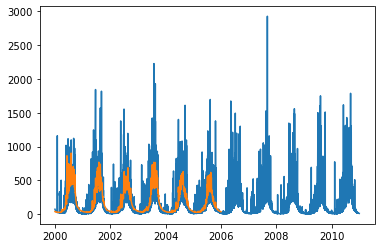

In [150]:
plt.plot(ds_sim.time, ds_sim.discharge_simulated)
plt.plot(ds_obs.time, ds_obs.discharge_observed)

In [151]:
time_obs = ts_timestamps_obs
time_sim = ts_timestamps_sim
disch_sim = disch_sim

Text(0, 0.5, 'discharge [m3 s-1]')

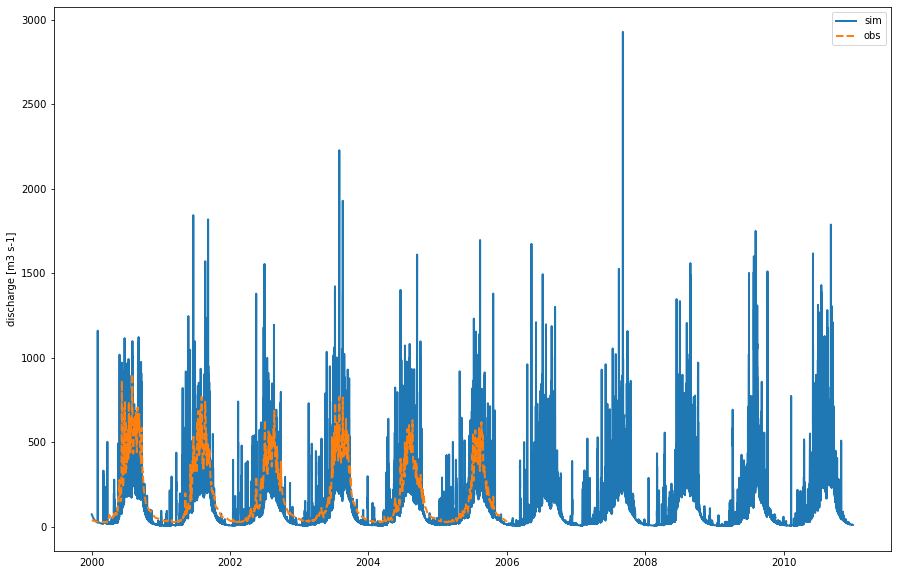

In [152]:
 # plot up the results
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "sim")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("observed and simulated discharge")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

# 8. Changing parameters on-the-fly

In [38]:
parameters = calib.region_model.get_region_parameter() # fetching parameters from the simulator object
print(u"Calibrated rain/snow threshold temp: {} C".format(parameters.st.tx)) # print current value of hs.tx

Calibrated rain/snow threshold temp: 0.4136356872321487 C


### st.tx

Running simulation...
Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

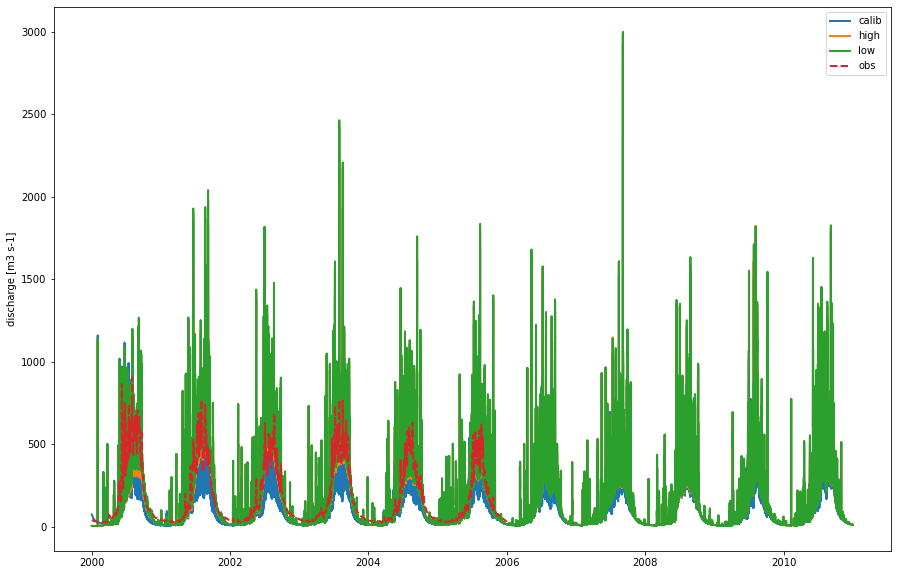

In [154]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.st.tx = 2.0 # setting a higher value for tx
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
parameters.st.tx = -3.0 # setting a lower value for tx

calib.run(state=s_init) # rerun the model, with new parameter

disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
calib.run(state=s_init) 
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("investigating parameter st.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")


### P_corr

Running simulation...
Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

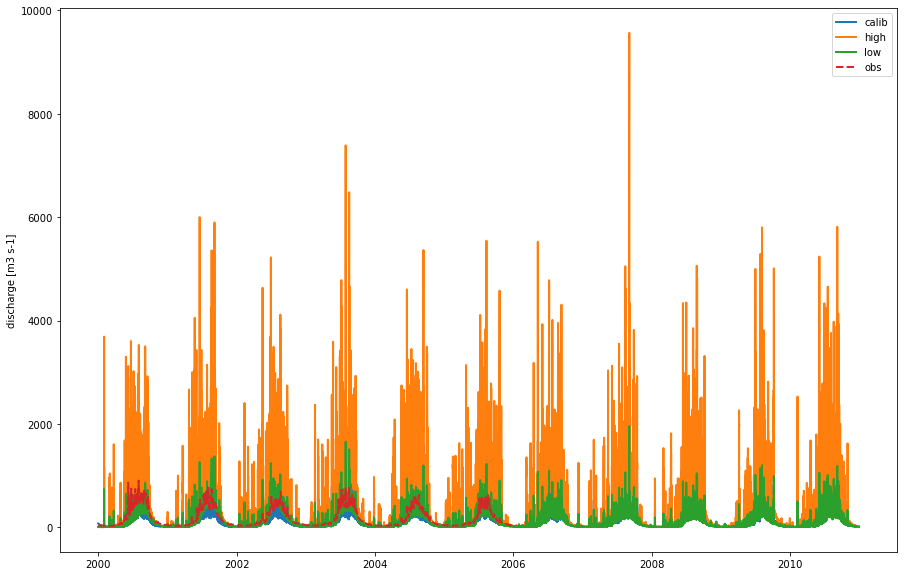

In [155]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.p_corr.scale_factor = 2.0 # setting a higher value for tx
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
parameters.p_corr.scale_factor = 0.4 # setting a lower value for p_corr

calib.run(state=s_init) # rerun the model, with new parameter

disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
calib.run(state=s_init) 
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("investigating parameter st.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

### Kirchner c1

Running simulation...
Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

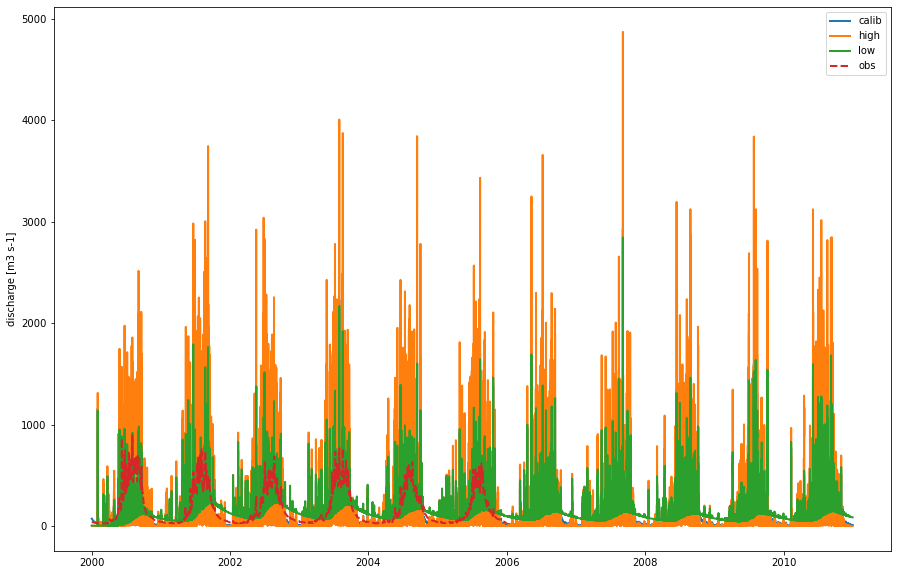

In [156]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.kirchner.c1 = 0.0 # setting a higher value for tx
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
parameters.kirchner.c1 = -8.0 # setting a lower value for p_corr

calib.run(state=s_init) # rerun the model, with new parameter

disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
calib.run(state=s_init) 
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("investigating parameter st.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

### Kirchner c2

Running simulation...
Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

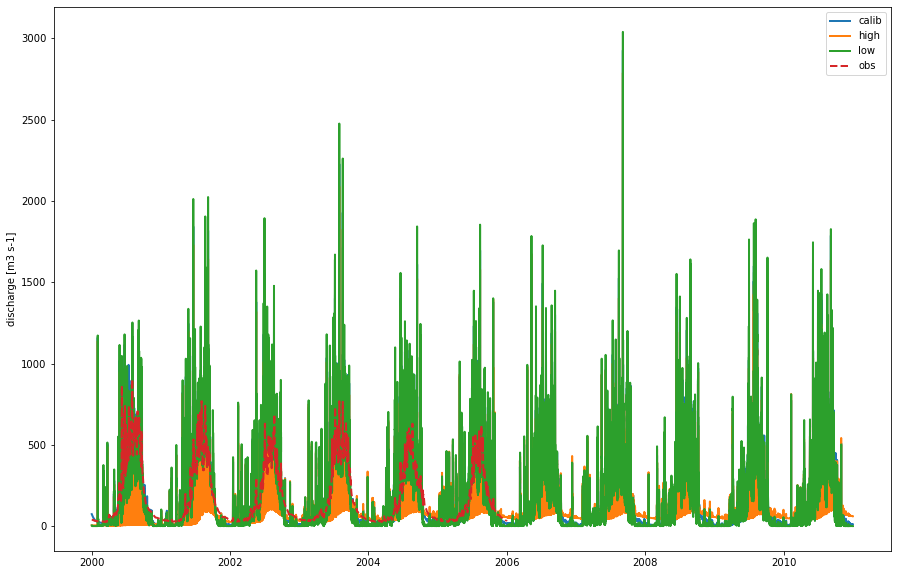

In [157]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.kirchner.c2 = 1.2 # setting a higher value for tx
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
parameters.kirchner.c2 = -1.0 # setting a lower value for p_corr

calib.run(state=s_init) # rerun the model, with new parameter

disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
calib.run(state=s_init) 
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("investigating parameter st.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

### Kirchner c3

Running simulation...
Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

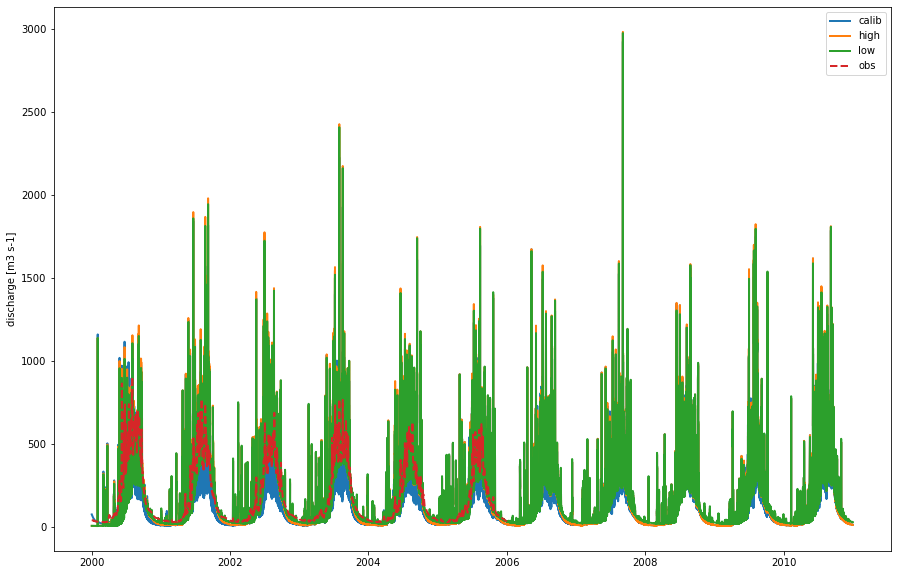

In [158]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.kirchner.c3 = -0.05 # setting a higher value for c3
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
parameters.kirchner.c3 = -0.15 # setting a lower value for p_corr

calib.run(state=s_init) # rerun the model, with new parameter

disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
calib.run(state=s_init) 
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("investigating parameter st.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

### ae_scale_factor

Running simulation...
Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

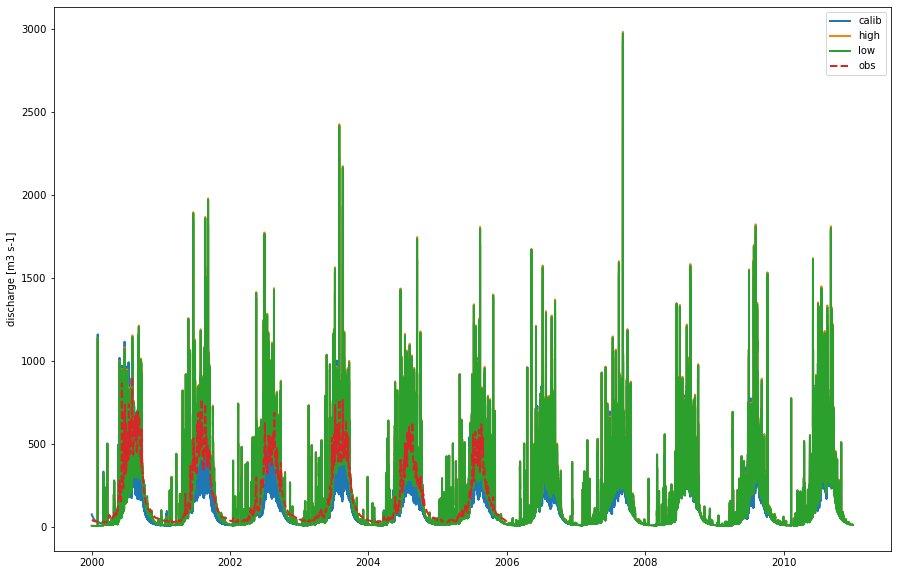

In [159]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.ae.ae_scale_factor = 1.5 # setting a higher value for c3
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
parameters.ae.ae_scale_factor = 1.0 # setting a lower value for p_corr

calib.run(state=s_init) # rerun the model, with new parameter

disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
calib.run(state=s_init) 
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("investigating parameter st.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

### st.cx

Running simulation...
Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

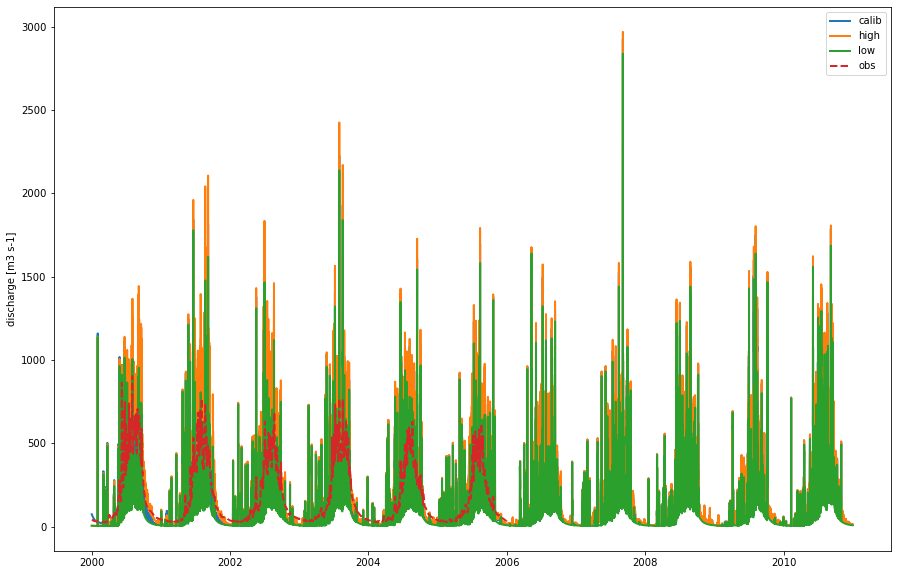

In [160]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.st.cx = 30.0 # setting a higher value for c3
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
parameters.st.cx = 0.0 # setting a lower value for p_corr

calib.run(state=s_init) # rerun the model, with new parameter

disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
calib.run(state=s_init) 
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("investigating parameter st.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

### st.ts

Running simulation...
Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

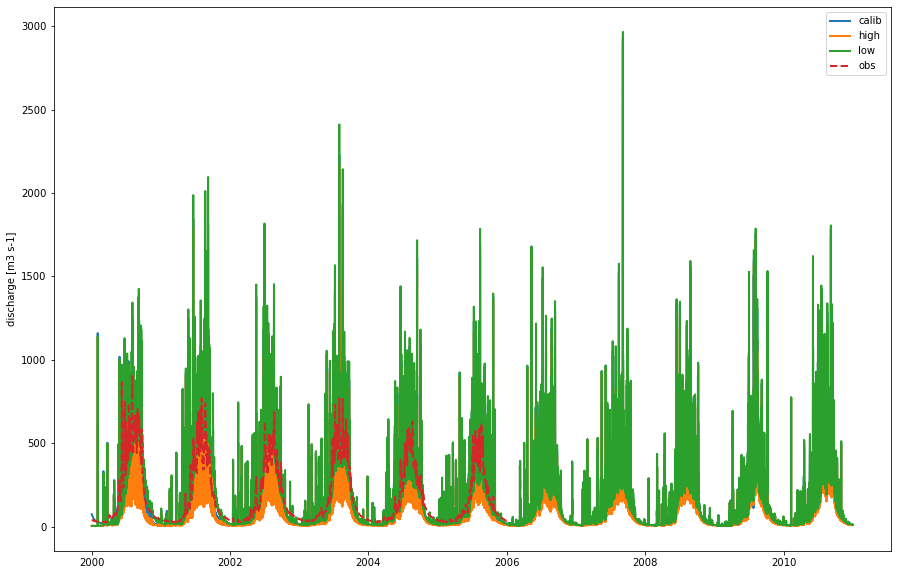

In [161]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.st.ts = 4.0 # setting a higher value for st.ts
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
parameters.st.ts = -4.0 # setting a lower value for st.ts

calib.run(state=s_init) # rerun the model, with new parameter

disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
calib.run(state=s_init) 
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("investigating parameter st.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

### lw_max

Running simulation...
Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

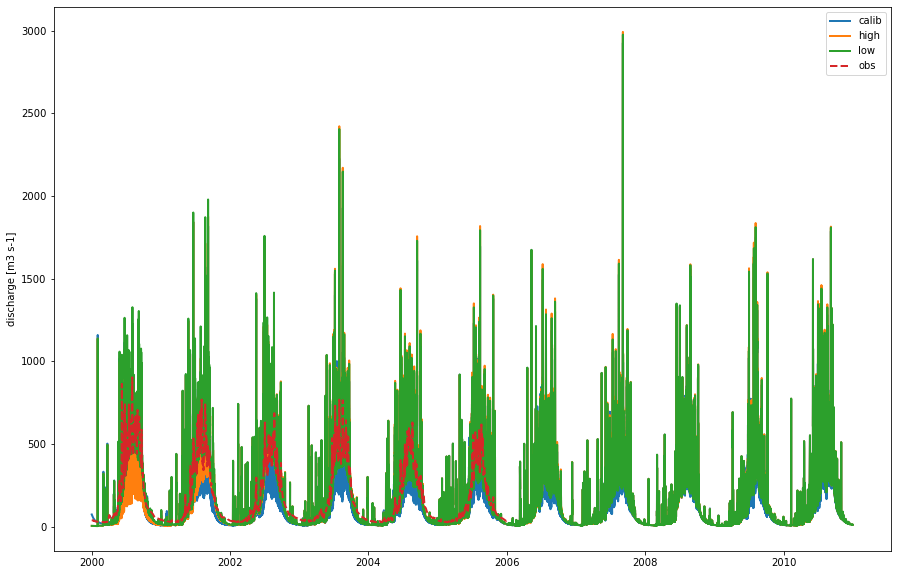

In [162]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.st.lwmax = 1.0 # setting a higher value for st.ts
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
parameters.st.lwmax = 0.0 # setting a lower value for st.ts

calib.run(state=s_init) # rerun the model, with new parameter

disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
calib.run(state=s_init) 
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("investigating parameter st.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

### Snow albedo

Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

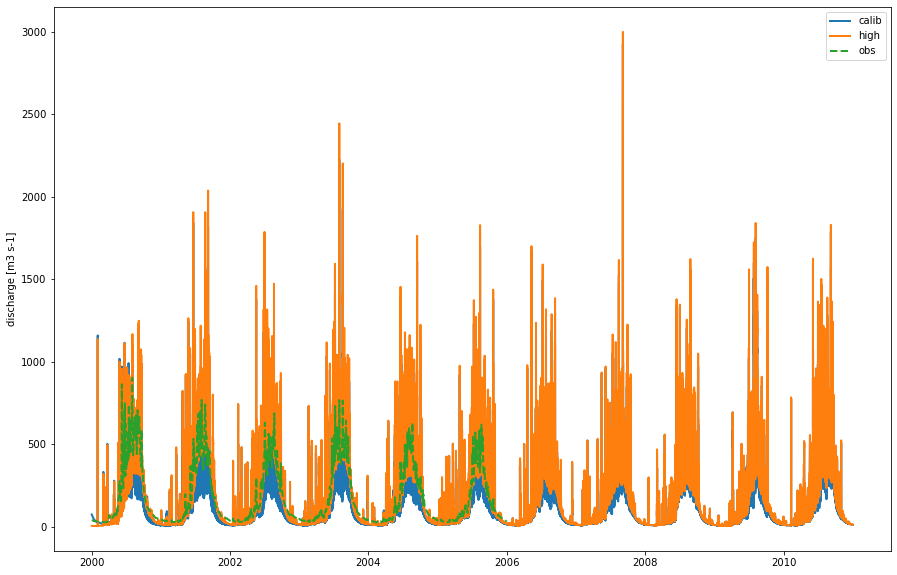

In [163]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.pt.albedo = 0.6 # setting a higher value for st.ts
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
#parameters.st.lwmax = 0.0 # setting a lower value for st.ts

#calib.run(state=s_init) # rerun the model, with new parameter

#disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
calib.run(state=s_init) 
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
#ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
#ax.set_title("investigating parameter st.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

In [ ]:
ds_sim = xr.Dataset(
    data_vars = dict(
        disch_sim = (['time'], disch_sim.values),
        temperature = (['time'], temp_sim.values),
        precipitation = (['time'], precip_sim.values),
        wind_speed = (['time'], wind_speed_sim.values),
        radiation = (['time'], rad_sim.values),
        relative_humidity = (['time'], rel_hum_sim.values),
        #calibration_parameter_range = ([], calib_params_range),
        #optimal_parameters = ([], params),
    ),
    coords = dict(
        time = (['time'],ts_timestamps_sim ),
    ),
    attrs = dict(description = description,
                 calib_start_time = start_time,
                 calib_run_time_step = run_time_step,
                 calib_number_of_steps = number_of_steps,
                 nse = 1 - calib.optimizer.calculate_goal_function(result_params),
                 elevation = str(elev_sim) + ' m.a.s.l.',
                 forest_area = str(forest_area_sim) + ' m^2',
                 glacier_area = str(glacier_area_sim) + ' m^2',
                 lake_area = str(lake_area_sim) + ' m^2',
                 total_area = str(total_area_sim) + ' m^2',
                 unspecified_area = str(unspecified_area_sim) + ' m^2',
                 reservoir_area = str(reservoir_area_sim) + ' m^2',
                kirchner_c1 = params['kirchner.c1'],
                kirchner_c2 = params['kirchner.c2'],
                kirchner_c3 = params['kirchner.c3'],
                ae_scale_factor = params['ae.ae_scale_factor'],
                gm_direct_response = params['gm.direct_response'],
                gm_dtf = params['gm.dtf'],
                p_corr = params['p_corr.scale_factor'],
                pt_albedo = params['pt.albedo'],
                pt_alpha = params['pt.alpha'],
                routing_velocity = params['routing.velocity'],
                routing_alpha = params['routing.alpha'],
                routing_beta = params['routing.beta'],
                # PTSTK
                st_cfr = params['st.cfr'],
                st_cx = params['st.cx'],
                st_lwmax = params['st.lwmax'],
                shape = params['st.shape'],
                st_ts = params['st.ts'],
                st_tx = params['st.tx'],
                msp_reservoir_direct_response_fraction = params['msp.reservoir_direct_response_fraction'],
                calibration_run_time = '162m 10s'
                
                
                
))

In [ ]:
ds_sim.to_netcdf(path = f'{shyftdata_dir}/SIMULATIONS/{description}.nc' ,
                 format = 'NETCDF4')

In [ ]:
xr.open_mfdataset(f'{shyftdata_dir}/SIMULATIONS/{description}.nc')